In [149]:
from scipy.stats import norm
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [150]:
agpop = pd.read_csv("data/agpop.csv", usecols=["acres92", "region"])
regions_pop = agpop.groupby("region").agg(["count", "mean", "var"]).acres92
regions_pop

,count,mean,var
region,,,
NC,1054,325950.957306,7.360554e+10
NE,220,90618.963636,6.298874e+09
S,1382,199140.437048,5.951470e+10
W,422,723343.964455,6.982924e+11


In [151]:
rng = np.random.default_rng(42)
n_iter = 1000

simple_sample_means = np.zeros(n_iter)
strat_sample_means = np.zeros(n_iter)

for i in range(n_iter):
    simple_sample = agpop.sample(frac=0.1, random_state=rng)
    simple_sample_means[i] = simple_sample.acres92.mean()
    strat_sample = agpop.groupby("region").sample(frac=0.1, random_state=rng)
    strat_sample_means[i] = strat_sample.acres92.mean()

var_ratio = strat_sample_means.var()/simple_sample_means.var()
print(f"var_ratio = {var_ratio:.2f}")

var_ratio = 0.86


In [152]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

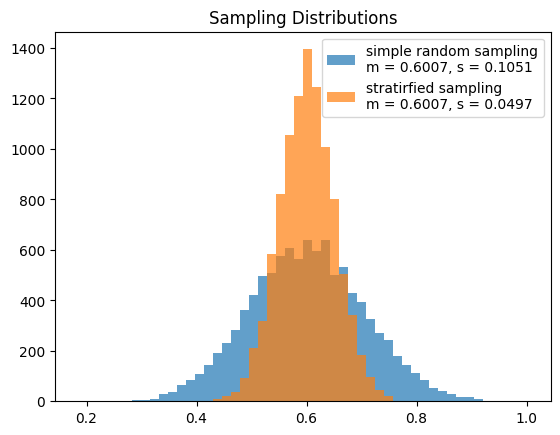

In [153]:
def make_srs(n, p, m0, s0, m1, s1, rng):
    X0 = rng.normal(m0, s0, size=n)
    X1 = rng.normal(m1, s1, size=n)
    Y = 1*(rng.uniform(size=n) < p)
    X = (1 - Y)*X0 + Y*X1
    return X

def make_strat(n, p, m0, s0, m1, s1, rng):
    n0 = int(p*n)
    n1 = n - n0
    X0 = rng.normal(m0, s0, size=n0)
    X1 = rng.normal(m1, s1, size=n1)
    return np.concatenate([X0, X1])

rng = np.random.default_rng(42)
n = 100
n_iter = 10000
means_srs = np.zeros(n_iter)
means_strat = np.zeros(n_iter)

for i in range(n_iter):
    x = make_srs(n, 0.7, 0, 0.5, 2, 0.5, rng)
    means_srs[i] = x.mean()
    x = make_strat(n, 0.7, 0, 0.5, 2, 0.5, rng)
    means_strat[i] = x.mean()
label = f"simple random sampling\nm = {means_srs.mean():.4f}, s = {means_srs.std():.4f}"
_, bins, __ = plt.hist(means_srs, bins=50, label=label, alpha=0.7)
label = f"stratirfied sampling\nm = {means_strat.mean():.4f}, s = {means_strat.std():.4f}"
plt.hist(means_strat, bins=bins, label=label, alpha=0.7)
plt.title("Sampling Distributions")
plt.legend();

A mixture of two Gaussians:

Suppose:
$$
\begin{aligned}
Y_i&\sim \operatorname{Bernoulli}(p)\\
X_i|Y_i=0&\sim \operatorname{Gaussian}(\mu_0, \sigma_0)\\
X_i|Y_i=1&\sim \operatorname{Gaussian}(\mu_1, \sigma_1)
\end{aligned}
$$

Let $f(x\mid\mu,\sigma)$ be the probability density function of the Gaussian distribution with mean $\mu$ and standard deviation $\sigma$:
$$
f(x\mid\mu,\sigma) = \frac1{\sqrt{2\pi}\sigma}
e^{-(x-\mu)/2\sigma^2}
$$

Then:
$$
X_i\sim (1-p)f(x\mid\mu_0,\sigma_0) + pf(x\mid\mu_1,\sigma_1)
$$

Suppose:
$$
\begin{aligned}
p &= 0.7\\
\mu_0&= 0&\sigma_0&= 0.5\\
\mu_1&= 2&\sigma_1&=0.5
\end{aligned}
$$

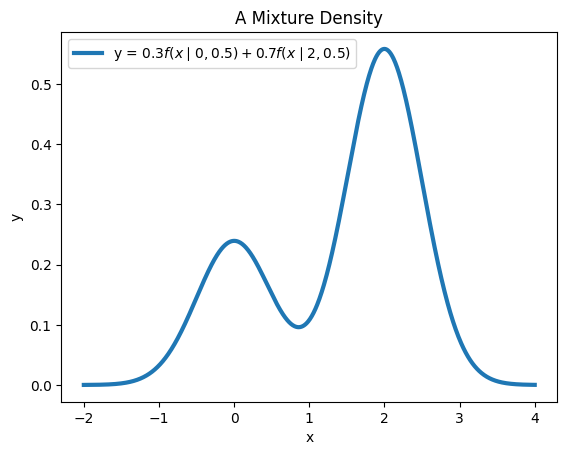

In [154]:
p = 0.7
mu0 = 0; sigma0 = 0.5
mu1 = 2; sigma1 = 0.5

f0 = norm(mu0, sigma0).pdf
f1 = norm(mu1, sigma1).pdf

x = np.linspace(-2, 4, 1000)
label = "y = $0.3f(x\mid0,0.5) + 0.7f(x\mid2,0.5)$"
plt.plot(x, (1-p)*f0(x) + p*f1(x), lw=3, label=label)
plt.legend()
plt.title("A Mixture Density")
plt.xlabel("x")
plt.ylabel("y");

In [155]:
# cf. Example 2.1
i = np.arange(8)
y = np.array([1, 2, 4, 4, 7, 7, 7, 8])
stratum = [0, 0, 0, 0, 1, 1, 1, 1]
df = pd.DataFrame({"i": i, "y": y, "stratum": stratum}).set_index("i")
df

,y,stratum
i,,
0,1,0
1,2,0
2,4,0
3,4,0
4,7,1
5,7,1
6,7,1
7,8,1


In [156]:
def subsets(k, n):
    """Generate subsets of size k from {0, 1, ..., n - 1}."""
    if type(k) != int or type(n) != int:
        raise ValueError("k and n must be integers.")
    if k < 0 or n < 0:
        raise ValueError("k and n must be nonnegative.")
    if k > n:
        raise ValueError("k cannot be larger than n.")
    if k == 0:
        return [[]]
    elif k == n:
        return [list(range(n))]
    else: # k < n
        return subsets(k, n - 1) + [[*s, n - 1] for s in subsets(k - 1, n - 1)]

In [157]:
simple = subsets(4, 8)
strat = [[I[0], I[1], J[0] + 4, J[1] + 4] for I in subsets(2, 4) for J in subsets(2, 4)]

total_srs = np.array([y[I].sum() for I in simple])
total_strat = np.array([y[I].sum() for I in strat])

print(f"mean of totals (srs) = {total_srs.mean():.2f}, var of totals (srs) = {total_srs.var():.2f}")
print(f"mean of totals (strat) = {total_strat.mean():.2f}, var of totals (strat) = {total_strat.var():.2f}")


mean of totals (srs) = 20.00, var of totals (srs) = 13.71
mean of totals (strat) = 20.00, var of totals (strat) = 2.50


## Framework for stratified sampling

### Population
Consider a population
$$
U = \{0,\ldots,N-1\}.
$$

A value $y_i$ is associated to each $i\in U$.

### Population parameters
The population parameter $t$ (total) and $\mu$ (mean) are defined by
$$
t = \sum_{i < N}y_i,\qquad \mu = \frac tN.
$$

### Stratification
Suppose $U$ is partitioned into $H$ strata $U_h$, $h < H$, so that
$$
U = \bigsqcup_{h<H} U_h.
$$

Write $N_h$ for the size of $U_h$, so that
$$
N = \sum_{h<H} N_h.
$$

### Stratum parameters
Let $t_h$ and $\mu_h$ be the total and mean values, respectively, for the $h$-th stratum:
$$
t_h = \sum_{i\in U_h}t_i,\qquad \mu_h = \frac{t_h}{N_h}
$$
We have:
$$
t = \sum_{h<H} t_h
$$

### Stratified sampling; estimating population parameters

Choose stratum sample sizes $n_h \leq N_h$. Set
$$
n = \sum_{h<H}n_h.
$$

Let $I_h$ be a sample of size $n_h$ drawn from $U_h$. We estimate $\mu_h$ and $t_h$ by
$$
\bar{y}_h = \frac1{n_h}\sum_{i\in I_h}y_i,\qquad\text{and}\qquad \hat{t}_h = N_h\bar{y}_h,
$$
respectively.

We use 
$$
\hat{t} = \sum_{h<H}\hat{t}_h=\sum_{h < H}N_h\bar{y}_h\qquad\text{and}\qquad \bar{y} = \frac{\hat{t}}N = \sum_{h<H}\frac{N_h}N\bar{y}_h
$$
as estimators of $t$ and $\mu$, repspectively.

To get confidence intervals for $\hat{t}$ and $\bar{y}$, we need their standard errors.

Let
$$
S_h = \frac1{N_h-1}\sum_{i\in U_h}(y_i - \mu_h)^2
$$
be the variance of stratum $h$.

Then
$$
\mathbb{V}(\hat{t}) = \sum_{h<H}\mathbb{V}(\hat{t}_h)
= \sum_{h<H}\left(1 - \frac{n_h}{N_h}\right)N_h^2\frac{S_h^2}{n_h}
$$
and
$$
\mathbb{V}(\bar{y}) = \frac1{N^2}\sum_{h<H}\mathbb{V}(\hat{t}_h)
= \sum_{h<H}\left(1 - \frac{n_h}{N_h}\right)\left(\frac{N_h}{N}\right)^2\frac{S_h^2}{n_h}.
$$

To estimate these quantities, we use the sample variances
$$
s_h^2 = \frac1{n_h-1}\sum_{i\in I_h}(y_i - \bar{y}_h)^2
$$
in place of the population variances $S_h^2$. Thus,
$$
\widehat{\mathbb{V}}(\hat{t}) = \sum_{h<H}\mathbb{V}(\hat{t}_h)
= \sum_{h<H}\left(1 - \frac{n_h}{N_h}\right)N_h^2\frac{s_h^2}{n_h}
$$
and
$$
\widehat{\mathbb{V}}(\bar{y}) = \frac1{N^2}\sum_{h<H}\mathbb{V}(\hat{t}_h)
= \sum_{h<H}\left(1 - \frac{n_h}{N_h}\right)\left(\frac{N_h}{N}\right)^2\frac{s_h^2}{n_h}.
$$

Taking square roots yields standard errors:
$$
\widehat{\operatorname{SE}}(\bar{y})=\sqrt{\widehat{\mathbb{V}}(\bar{y})},\qquad
\widehat{\operatorname{SE}}(\hat{t})=\sqrt{\widehat{\mathbb{V}}(\hat{t})},\qquad
$$

### Confidence intervals
Approximate $100(1-\alpha)\%$ confidence intervals for $\bar{y}$ and $\hat{t}$ are given by
$$
\bar{y}\pm z_{\alpha/2}\widehat{\operatorname{SE}}(\bar{y})\qquad\text{and}\qquad
\hat{t}\pm z_{\alpha/2}\widehat{\operatorname{SE}}(\hat{t}),
$$
respectively.


### Example 4.3

The American Council of Learned Societies (ACLS) surveyed seven of its societies using a stratified random sample. Using their data, estimate the proportion of female members in the ACLS and the standard error of this quantity.

In [163]:
discipline = ["Literature", "Classics", "Philosophy", "History", "Linguistics", "Political science", "Sociology"]
membership = [9100, 1950, 5500, 10850, 2100, 5500, 9000]
surveys_returned = [636, 451, 481, 611, 493, 575, 588]
female_membership = [242, 122, 87, 116, 177, 75, 153]
df = pd.DataFrame({
    "discipline": discipline,
    "membership": membership,
    "surveys_returned": surveys_returned,
    "female_membership": female_membership
})
df

,discipline,membership,surveys_returned,female_membership
0,Literature,9100,636,242
1,Classics,1950,451,122
2,Philosophy,5500,481,87
3,History,10850,611,116
4,Linguistics,2100,493,177
5,Political science,5500,575,75
6,Sociology,9000,588,153


The variable of interest here is
$$
y_i=\begin{cases}
1&\text{if sampling unit $i$ is female,}\\
0&\text{otherwise.}
\end{cases}
$$

Then
- $\hat{p}_h:=\bar{y}_h$ is the proportion of females in among those surveyed in stratum $h$,
- $\hat{t}_h$ is the number of females among those surveyed in stratum $h$.

Recall:
$$
\widehat{\mathbb{V}}(\bar{y}) = \frac1{N^2}\sum_{h<H}\mathbb{V}(\hat{t}_h)
= \sum_{h<H}\left(1 - \frac{n_h}{N_h}\right)\left(\frac{N_h}{N}\right)^2\frac{s_h^2}{n_h}.
$$

Exercise: Show that
$$
s_h^2 = \frac{n_h\hat{p}_h(1 - \hat{p}_h)}{n_h - 1}.
$$


In [188]:
N = df.membership
n = df.surveys_returned
that = df.female_membership
phat = that/n
print(f"The proportion of women is approximately {that.sum()/n.sum():.4f}.")

s2 = n*phat*(1 - phat)/(n - 1) # see exercise
vh = np.sum((1 - n/N)*(N/N.sum())**2*s2/n)
se = np.sqrt(vh)
print(f"The estimated standard error is {se:.4f}.")

The proportion of women is approximately 0.2535.
The estimated standard error is 0.0071.


### Stratum parameters
Let $t_h$ and $\mu_h$ be the total and mean values, respectively, for the $h$-th stratum:
$$
t_h = \sum_{i\in U_h}t_i,\qquad \mu_h = \frac{t_h}{N_h}
$$
We have:
$$
t = \sum_{h<H} t_h
$$

### Sampling; estimation of population parameters
Given a sample $I$ of size $n$ drawn from $U$.

Estimate the population mean $\mu$ and the population total $t$ by the sample mean $\bar{y}$ and $\hat{t}$, respectively, where
$$
\bar{y} = \sum_{i\in I}y_i,\qquad\text{and}\qquad \hat{t} = N\bar{y},
$$
respectively.

### Sample stratification; estimation of stratum parameters

Set
$$
I_h = I\cap U_h.
$$

We estimate the stratum mean $\mu_h$ and the stratum total $t_h$ by
$$
\bar{y}_h = \sum_{i\in I_h}y_i,\qquad \hat{t}_h = N_h\bar{y}_h.
$$

Exercise: Show that $\mathbb{E}[\bar{y}_h] = \mu_h$ and that $\mathbb{E}[\hat{t}_h] = t_h$.

The random variable $t_h$ are independent since the samples $I_h$ are chosen independently. Therefore,
$$
\mathbb{V}[\hat{t}] = \sum_{h<H}\mathbb{V}[\hat{t}_h].
$$

Since $I_h$ is a simple random sample drawn from $U_h$,
$$
\mathbb{V}[\hat{t}_h] = \left(1 - \frac{n_h}{N_h}\right)N_h^2\frac{V_h}{n_h},
$$
where
$$
V_h=\frac{1}{N_h-1}\sum_{i\in U_h}(y_i - \mu_h)^2.
$$

Therefore,
$$
\mathbb{V}[\hat{t}] = \sum_{h<H}\left(1 - \frac{n_h}{N_h}\right)N_h^2\frac{V_h}{n_h}.
$$

### Proportional allocation
Assume proportional allocation, i.e.,
$$
\frac{n_h}{N_h} = \frac{n}{N}
$$
for all $h$.

Then
$$
\begin{aligned}
\mathbb{V}[\hat{t}] &= \sum_{h<H}\left(1 - \frac{n_h}{N_h}\right)N_h^2\frac{V_h}{n_h}\\
&= \left(1 - \frac{n}{N}\right)\sum_{h<H}N_h^2\frac{V_h}{n_h}\\
&= \left(1 - \frac{n}{N}\right)\frac{N_h}{n_h}\sum_{h<H}N_hV_h\\
&= \left(1 - \frac{n}{N}\right)\frac{N}{n}\left(\sum_{h<H}(N_h - 1)V_h + \sum_{h<H}V_h\right)\\
&= \left(1 - \frac{n}{N}\right)\frac{N}{n}\left(\sum_{h<H}\sum_{i\in U_h}(y_i - \mu_h)^2 + \sum_{h<H}V_h\right)\\
&= \left(1 - \frac{n}{N}\right)\frac{N}{n}\left(\operatorname{SSW} + \sum_{h<H}V_h\right),
\end{aligned}
$$
where 
$$
\operatorname{SSW} = \sum_{h<H}\sum_{i\in U_h}(y_i - \mu_h)^2
$$
is the *sum of squares within* the strata

$$
\begin{aligned}
\sum_{i<N}(y_i - \mu)^2 &= \sum_{h<H}\sum_{i\in U_h}(y_{i} - \mu)^2\\
&= \sum_{h<H}\sum_{i\in U_h}(y_{i} - \mu_h + \mu_h - \mu)^2\\
&= \sum_{h<H}\sum_{i\in U_h}(y_{i} - \mu_h)^2 + \sum_{h<H}\sum_{i\in U_h}(\mu_h - \mu)^2
+ 2\sum_{h<H}\sum_{i\in U_h}(y_{i} - \mu_h)(\mu_h - \mu)\\
&= \sum_{h<H}\sum_{i\in U_h}(y_{i} - \mu_h)^2 + \sum_{h<H}N_h(\mu_h - \mu)^2\\
&= \operatorname{SSW} + \operatorname{SSB},
\end{aligned}
$$
where 
$$
\operatorname{SSB} = \sum_{h<H}\sum_{i\in U_h}(\mu_h - \mu)^2 = \sum_{h<H}N_h(\mu_h - \mu)^2.
$$